# import Libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import math
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [46]:
data=pd.read_csv('train.csv')

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analyze the Data


<AxesSubplot:xlabel='Survived', ylabel='count'>

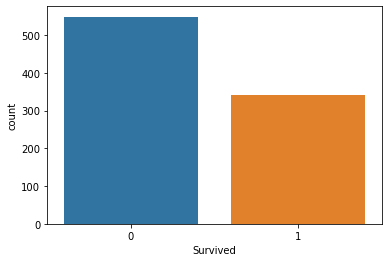

In [48]:
sns.countplot(x="Survived",data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

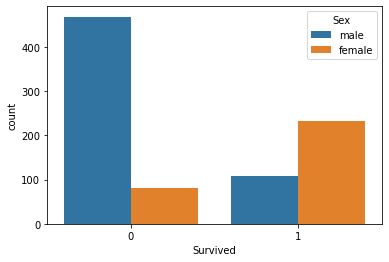

In [49]:
sns.countplot(x="Survived",hue="Sex",data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

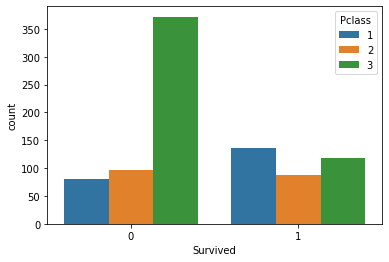

In [50]:
sns.countplot(x="Survived",hue="Pclass",data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

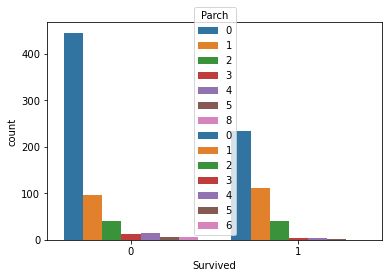

In [51]:
sns.countplot(x="Survived",hue="SibSp",data=data)
sns.countplot(x="Survived",hue="Parch",data=data)

<AxesSubplot:ylabel='Frequency'>

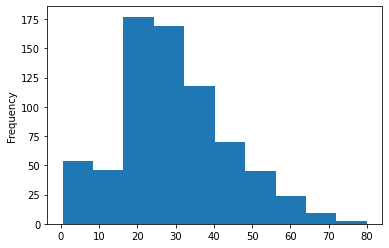

In [52]:
data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

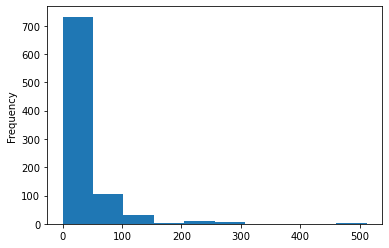

In [53]:
data['Fare'].plot.hist()

<AxesSubplot:xlabel='Survived', ylabel='count'>

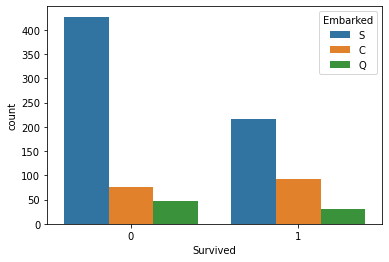

In [54]:
sns.countplot(x="Survived",hue="Embarked",data=data)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Cleaning the data

In [56]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

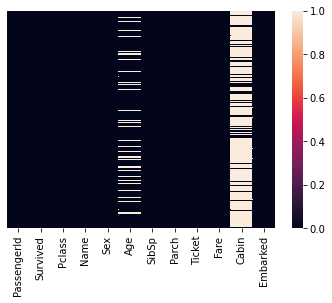

In [58]:
sns.heatmap(data.isnull(),yticklabels=False )

In [59]:
data.dropna(inplace=True)

In [60]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

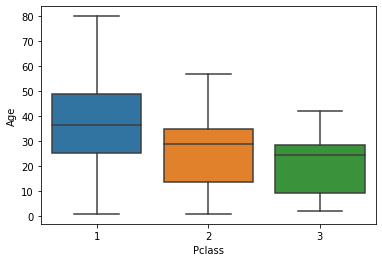

In [61]:
sns.boxplot(x="Pclass", y="Age",data=data)

<AxesSubplot:>

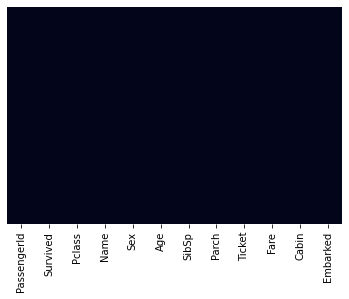

In [62]:
sns.heatmap(data.isnull(),yticklabels=False ,cbar=False)

In [63]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [64]:
data.drop(['Name','PassengerId'],axis=1,inplace=True)

In [65]:
data.head()
data.count()

Survived    183
Pclass      183
Sex         183
Age         183
SibSp       183
Parch       183
Ticket      183
Fare        183
Cabin       183
Embarked    183
dtype: int64

In [66]:
sex=pd.get_dummies(data["Sex"],drop_first=True)
sex.head()

,male
1,0
3,0
6,1
10,0
11,0


In [67]:
cabin=pd.get_dummies(data["Cabin"]).any(axis=1)
cabin.head()

1     True
3     True
6     True
10    True
11    True
dtype: bool

In [68]:
ticket=pd.get_dummies(data["Ticket"]).any(axis=1)
cabin.head()

1     True
3     True
6     True
10    True
11    True
dtype: bool

In [69]:
embarked=pd.get_dummies(data["Embarked"],drop_first=True).any(axis=1)
embarked.head()

1     False
3      True
6      True
10     True
11     True
dtype: bool

In [70]:
data.drop(['Sex','Cabin','Ticket','Embarked'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500


In [71]:
data=pd.concat([data,sex,cabin,ticket,embarked],axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,0,1,2
1,1,1,38.0,1,0,71.2833,0,True,True,False
3,1,1,35.0,1,0,53.1000,0,True,True,True
6,0,1,54.0,0,0,51.8625,1,True,True,True
10,1,3,4.0,1,1,16.7000,0,True,True,True
11,1,1,58.0,0,0,26.5500,0,True,True,True


In [72]:
data.head()
data.count()

Survived    183
Pclass      183
Age         183
SibSp       183
Parch       183
Fare        183
male        183
0           183
1           183
2           183
dtype: int64

# Train and Test

In [73]:
x=data.drop("Survived",axis=1)

y=data["Survived"]
x.count()

Pclass    183
Age       183
SibSp     183
Parch     183
Fare      183
male      183
0         183
1         183
2         183
dtype: int64

In [74]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,random_state=1,test_size=0.25)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((137, 9), (46, 9), (137,), (46,))

# model

In [75]:
logmodel=LogisticRegression()

In [76]:
logmodel.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# predict

In [77]:
pred = logmodel.predict(X_test)
pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0], dtype=int64)

In [78]:
classification_report(Y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.56      0.33      0.42        15\n           1       0.73      0.87      0.79        31\n\n    accuracy                           0.70        46\n   macro avg       0.64      0.60      0.61        46\nweighted avg       0.67      0.70      0.67        46\n'

In [79]:
confusion_matrix(Y_test,pred)

array([[ 5, 10],
       [ 4, 27]], dtype=int64)

In [80]:
accuracy_score(Y_test,pred)

0.6956521739130435

# Test with data

In [87]:
exp = 1,38.0,1,0,71.2833,0,True,True,False
logmodel.predict([exp])[0]
print(f"the person with data {exp} is survied or not = {(logmodel.predict([exp])[0])}")

the person with data (1, 38.0, 1, 0, 71.2833, 0, True, True, False) is survied or not = 1


In [88]:
exp = 1,54.0,0,0,51.8625,1,True,True,True
logmodel.predict([exp])[0]
print(f"the person with data {exp} is survied or not = {(logmodel.predict([exp])[0])}")

the person with data (1, 54.0, 0, 0, 51.8625, 1, True, True, True) is survied or not = 0
